In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Merge SIFT-BOW to Main Feature

In [ ]:
df = pd.read_csv('main_features.csv') # sau em có đổi tên file này thành tên file em nộp
df2 = pd.read_csv('sift-bow_features.csv')  
 # 2 file csv này có từ 2 file code

In [5]:
df2 = df2.drop(columns=["image_path"])
columns_to_scale = [col for col in df2.columns if col != 'label']
scaler = StandardScaler()
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])
label = LabelEncoder()
df2['label'] = label.fit_transform(df2['label'])


Sift-Bow feature selection in Df2 using RF

In [6]:
n_loops = 5
accuracies = []
precisions = []
recalls = []
f1_scores = []

for i in range(n_loops):
    train_data, test_data = train_test_split(df2, test_size=0.3, random_state=42 + i)

    X_train = train_data.drop(columns=["label"])
    y_train = train_data["label"]
    X_test = test_data.drop(columns=["label"])
    y_test = test_data["label"]

    rf = RandomForestClassifier(
        n_estimators=500,     
        max_depth=None,     
        min_samples_split=2,  
        min_samples_leaf=1,  
        max_features='sqrt', 
        bootstrap=True,   
        random_state=42 + i,
        oob_score=True,
        n_jobs=-1
    )

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-score: {avg_f1:.4f}")


c:\Users\5530\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\5530\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\5530\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Average Accuracy: 0.5689
Average Precision: 0.5812
Average Recall: 0.5689
Average F1-score: 0.5123


c:\Users\5530\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
import plotly.express as px
feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False)
fig = px.bar(importance_df, x='feature', y='importance', title='Feature Importances', labels={'importance': 'Importance', 'feature': 'Feature'}, width=1200, height=800)
fig.show()

Top 9 feature important in Sift-bow in Df2

In [8]:
threshold = 0.006
important_features = importance_df[importance_df['importance'] > threshold]['feature'].tolist()
 
print(f"Number of important features: {len(important_features)}")
# important_features.append("label")
# filtered_data = df2[important_features]

Number of important features: 9


In [9]:
threshold = 0.006
important_features = importance_df[importance_df['importance'] > threshold]['feature'].tolist()
important_df = df2[important_features]

In [10]:
df2_mean = df2.mean(axis=1)
df2_std = df2.std(axis=1)
df['mean'] = df2_mean
df['std'] = df2_std
for feature in important_features:
    if feature in df2.columns:
        df[feature] = df2[feature]
print(df)

                                              image_path  \
0      ./Plant_leave_diseases_dataset_without_augment...   
1      ./Plant_leave_diseases_dataset_without_augment...   
2      ./Plant_leave_diseases_dataset_without_augment...   
3      ./Plant_leave_diseases_dataset_without_augment...   
4      ./Plant_leave_diseases_dataset_without_augment...   
...                                                  ...   
55443  ./Plant_leave_diseases_dataset_without_augment...   
55444  ./Plant_leave_diseases_dataset_without_augment...   
55445  ./Plant_leave_diseases_dataset_without_augment...   
55446  ./Plant_leave_diseases_dataset_without_augment...   
55447  ./Plant_leave_diseases_dataset_without_augment...   

                                        label      mean_H     mean_S  \
0                          Apple___Apple_scab   74.092346  91.905457   
1                          Apple___Apple_scab   79.182404  81.935562   
2                          Apple___Apple_scab   69.492859  87.8

# PreProcessing DF

In [ ]:
df = df.drop(columns = ["image_path"])

In [7]:
columns_to_scale = [col for col in df.columns if col != 'label']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
label = LabelEncoder()
df['label'] = label.fit_transform(df['label'])


In [ ]:
# mean_values = df.mean()
# columns_to_drop = mean_values[mean_values == 0].index
# df = df.drop(columns=columns_to_drop)

In [13]:
# df.isna().sum()
df.fillna(df.mean(), inplace= True)

In [14]:
#save to csv file
df.to_csv("main_features+sift-bow.csv", index = False)

# Training Main features merge with Sift Bow

In [3]:
df = pd.read_csv("main_features+sift-bow.csv")

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
X_train = train_data.drop(columns=["label"])
y_train = train_data["label"]
X_test = test_data.drop(columns=["label"])
y_test = test_data["label"]
svm = SVC(C=100, gamma='scale', kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted') 
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix) #9797

Accuracy: 0.9797
Precision: 0.9797
Recall: 0.9797
F1-score: 0.9797
Confusion Matrix:
[[ 177    2    0 ...    0    0    0]
 [   3  190    0 ...    0    0    0]
 [   1    0   80 ...    0    0    0]
 ...
 [   0    0    0 ... 1583    0    0]
 [   0    0    0 ...    0  106    0]
 [   0    0    0 ...    0    0  486]]


In [9]:
X_train.shape

(38813, 320)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
n_loops = 3
accuracies = []
precisions = []
recalls = []
f1_scores = []
for i in range(n_loops):
    train_data, test_data = train_test_split(df, test_size=0.3, random_state=42 + i)
    X_train = train_data.drop(columns=["label"])
    y_train = train_data["label"]
    X_test = test_data.drop(columns=["label"])
    y_test = test_data["label"]

    rf = RandomForestClassifier(
        n_estimators=500,     
        max_depth=None,     
        min_samples_split=2,  
        min_samples_leaf=1,  
        max_features='sqrt', 
        bootstrap=True,   
        random_state=42 + i,
        oob_score=True,
        n_jobs=-1
    )

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Tính giá trị trung bình cho mỗi chỉ số
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-score: {avg_f1:.4f}")
#9565

Average Accuracy: 0.9565
Average Precision: 0.9570
Average Recall: 0.9565
Average F1-score: 0.9554


In [11]:
import plotly.express as px
feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False)
fig = px.bar(importance_df, x='feature', y='importance', title='Feature Importances', labels={'importance': 'Importance', 'feature': 'Feature'}, width=1200, height=800)
fig.show()


In [12]:
# Set display options to show the entire DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
print(importance_df)

                     feature  importance
310                      std    0.048847
309                     mean    0.013907
233                    std_v    0.008815
16                 hist_hue5    0.008813
301                 solidity    0.008431
311              feature_181    0.007804
13                 hist_hue2    0.007752
21                hist_hue10    0.007716
6                     H_sqrt    0.007630
0                     mean_H    0.007437
232                    std_U    0.007342
290       harris_formula_sum    0.007115
22                hist_hue11    0.007104
220                    std_a    0.006982
223                   a_sqrt    0.006943
3                      std_H    0.006929
249              correlation    0.006906
293         corner_area_mean    0.006861
14                 hist_hue3    0.006853
17                 hist_hue6    0.006760
15                 hist_hue4    0.006519
241           brightness_hsv    0.006399
282                  lbp_std    0.006334
217             

In [13]:
threshold = 0.0045
important_features = importance_df[importance_df['importance'] > threshold]['feature'].tolist()
print(f"Number of important features: {len(important_features)}")
important_features.append("label")
filtered_data = df[important_features]
train_data, test_data = train_test_split(filtered_data, test_size=0.3, random_state=42)
X_train = train_data.drop(columns=["label"])
y_train = train_data["label"]
X_test = test_data.drop(columns=["label"])
y_test = test_data["label"]
#00045 60   

Number of important features: 60


Accuracy: 0.9824
Precision: 0.9825
Recall: 0.9824
F1-score: 0.9824
Confusion Matrix:


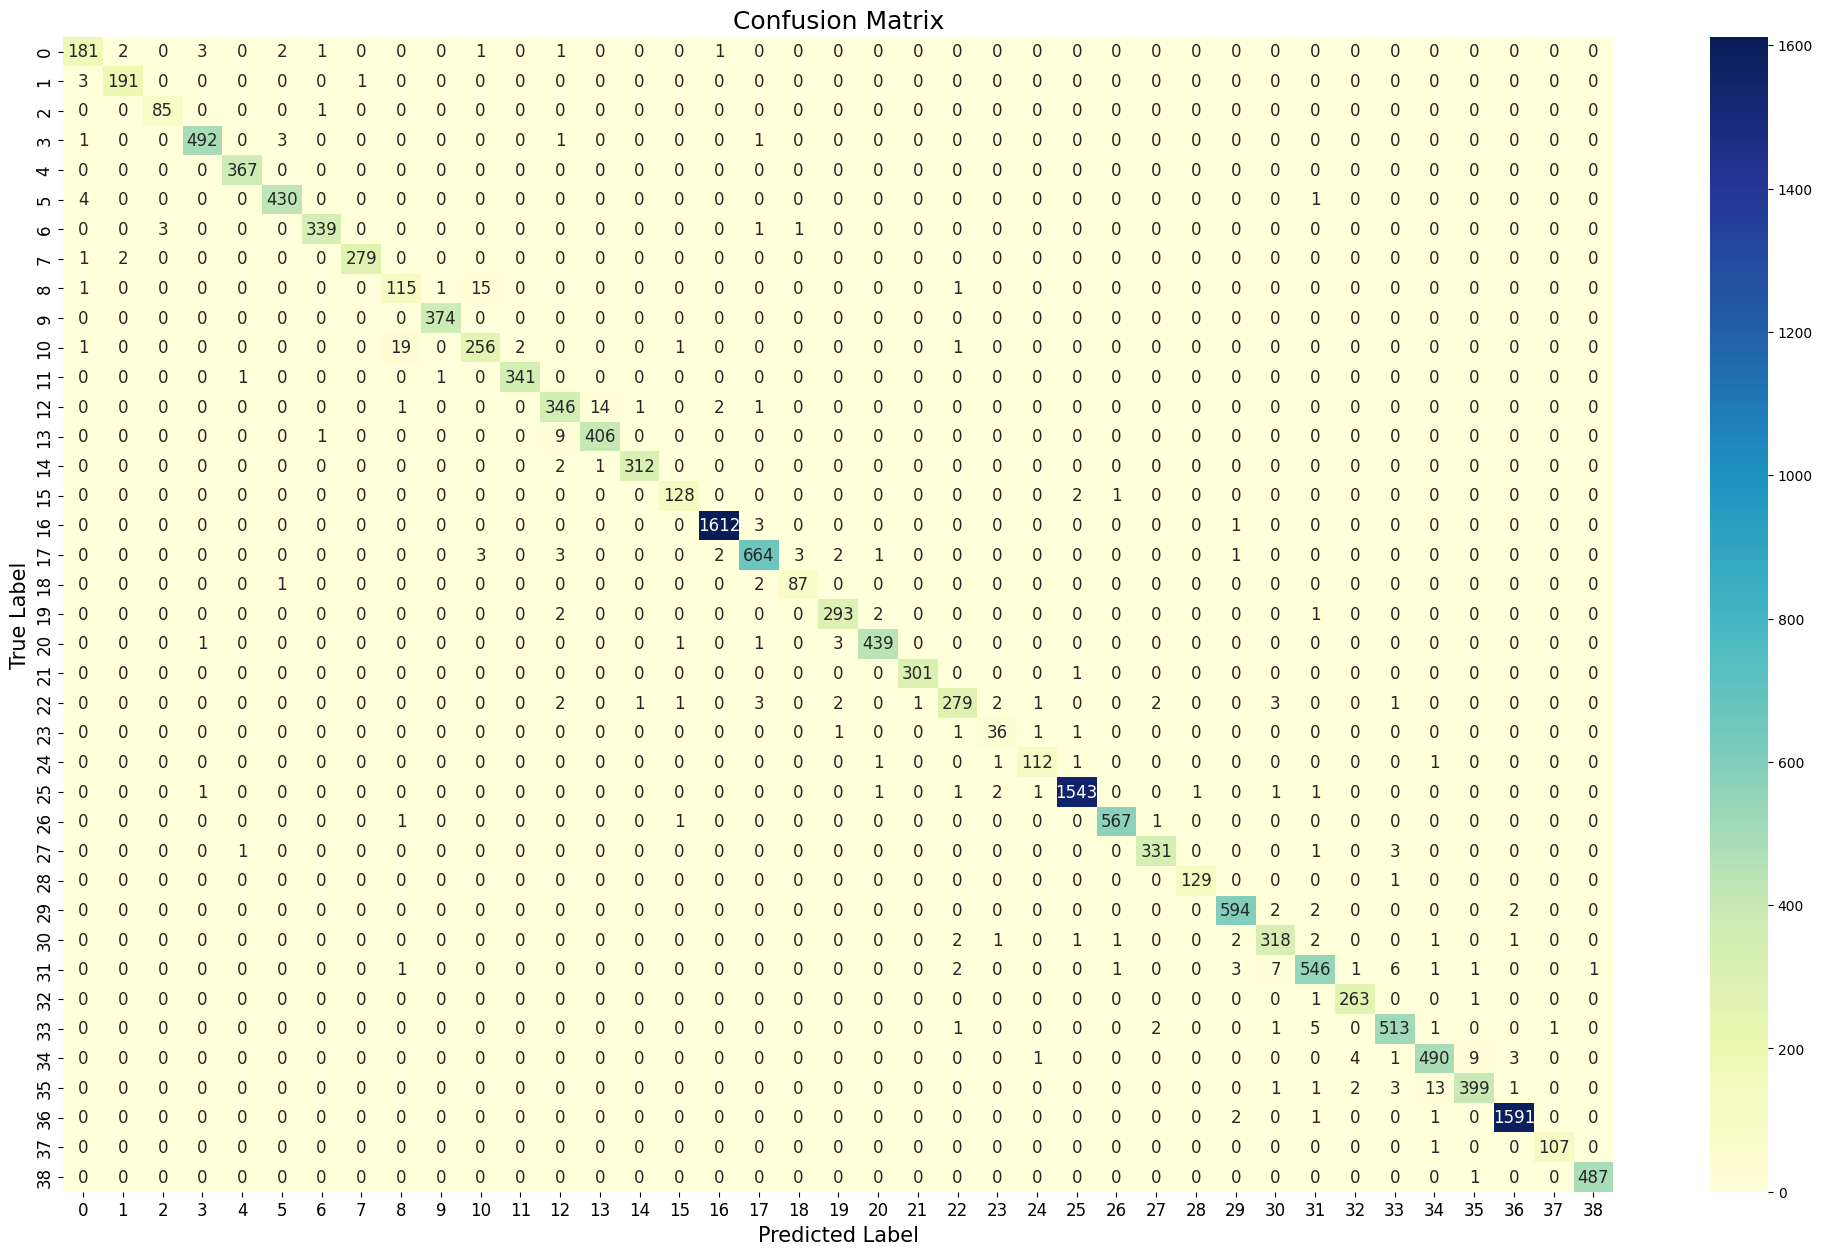

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
svm = SVC(C=100, gamma='scale', kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
# Vẽ confusion matrix
plt.figure(figsize=(25, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=True, annot_kws={"size": 12})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()  
# 9824